In [1]:
import pandas as pd
import numpy as np
from osgeo import gdal
import glob
import os
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
#definidimos la carpeta en que estan los datos
os.chdir(r"F:\UNAM\Doctorado\SIG\Clima\Precipitacion")

In [3]:
dt=pd.read_csv("9048P.txt",sep = ",", engine='python')
dt['Fecha'] = pd.to_datetime(dt['Fecha'])

In [4]:
#obtener media mensual por año
dt_sum = dt.groupby([dt['Fecha'].dt.month_name(), dt['Fecha'].dt.year], sort=False).sum()  # get sum for each individual month
dt_sum.index.rename(['month','year'], inplace=True)  # just renaming the index
dt_sum.reset_index(level=0, inplace=True)  # make the month-index to a column

#dividir cada 30 años
Pm=dt_sum.iloc[0:360,:]
Sc=dt_sum.iloc[360:720,:]
Tc=dt_sum.iloc[720:1080,:]
Ct=dt_sum.iloc[1080:1440,:]
Qt=dt_sum.iloc[1440:,]

#obtener media mensual total
tPm = Pm.groupby([Pm['month']], sort=False).mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tPm = tPm.reindex(new_order, axis=0)

tSc = Sc.groupby([Sc['month']], sort=False).mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tSc= tSc.reindex(new_order, axis=0)

tTc = Tc.groupby([Tc['month']], sort=False).mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tTc = tTc.reindex(new_order, axis=0)

tCt = Ct.groupby([Ct['month']], sort=False).mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tCt = tCt.reindex(new_order, axis=0)

tQt = Qt.groupby([Qt['month']], sort=False).mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tQt = tQt.reindex(new_order, axis=0)


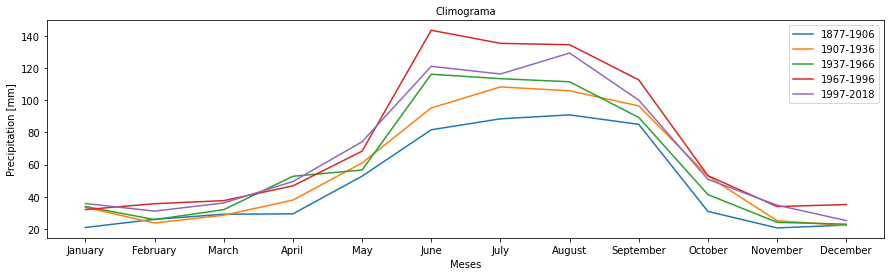

In [5]:
#graficamos climograma
plt.figure(figsize=(15,4))
plt.plot(tPm.index,tPm["P(mm)"], label="1877-1906")
#plt.figure(figsize=(15,4))
plt.plot(tSc.index,tSc["P(mm)"], label="1907-1936")
#plt.figure(figsize=(15,4))
plt.plot(tTc.index,tTc["P(mm)"], label="1937-1966")
#plt.figure(figsize=(15,4))
plt.plot(tCt.index,tCt["P(mm)"], label="1967-1996")
#plt.figure(figsize=(15,4))
plt.plot(tQt.index,tQt["P(mm)"], label="1997-2018")

plt.legend(loc='best', facecolor='w', fontsize=10)
plt.ylabel('Precipitation [mm]', fontsize=10)
plt.xlabel('Meses', fontsize=10)
plt.title('Climograma', fontsize=10)

plt.savefig("Climograma.png")

plt.show()


